In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke file dataset
dataset1_path = '/content/drive/MyDrive/Colab Notebooks/earthquake_data.csv'
dataset2_path = '/content/drive/MyDrive/Colab Notebooks/earthquake_1995-2023.csv'

# Baca dataset
dataset1 = pd.read_csv(dataset1_path)
dataset2 = pd.read_csv(dataset2_path)

# Gabungkan dataset
df= pd.merge(dataset1, dataset2)

In [ ]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [ ]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [ ]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

Hapus Data yang tidak perlu

In [ ]:
 # df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)

In [ ]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

<ipython-input-123-fe0ebb46a50c>:1: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
df.head()

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,Year,Month
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,2022,11
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN,2022,11
2,M 7.0 -,7.0,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji,2022,11
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN,2022,11
4,M 6.6 -,6.6,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN,2022,11


In [ ]:
## Periksa dataset, baris, kolom, entri duplikat & nilai yang hilang
print(f'\033[94mJumlah record (baris) dalam dataset adalah: {df.shape[0]}')
print(f'\033[94mJumlah fitur (kolom) dalam dataset adalah: {df.shape[1]}')
print(f'\033[94mJumlah entri duplikat dalam dataset adalah: {df.duplicated().sum()}')
print(f'\033[94mJumlah nilai yang hilang dalam dataset adalah: {sum(df.isna().sum())}')

Jumlah record (baris) dalam dataset adalah: 782
Jumlah fitur (kolom) dalam dataset adalah: 20
Jumlah entri duplikat dalam dataset adalah: 0
Jumlah nilai yang hilang dalam dataset adalah: 1246


In [ ]:
df.isnull().sum()

title          0
magnitude      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
Year           0
Month          0
dtype: int64

In [ ]:
# Identifikasi kolom non-numerik
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Kolom non-numerik:", non_numeric_columns)

Kolom non-numerik: Index(['title', 'alert', 'net', 'magType', 'location', 'continent', 'country'], dtype='object')


In [ ]:
# Hapus kolom non-numerik atau tangani mereka secara terpisah
df_numeric = df.drop(columns=non_numeric_columns)

EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

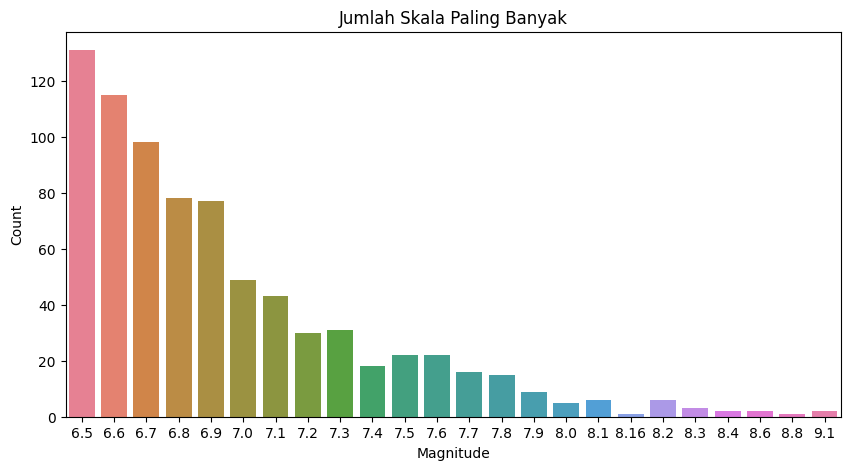

In [ ]:
# Buat palet warna untuk jumlah kategori
unique_values = df['magnitude'].unique()
palette = sns.color_palette("husl", len(unique_values))

# Plot menggunakan seaborn dengan 'hue'
plt.figure(figsize=(10, 5))
sns.countplot(x='magnitude', data=df, hue='magnitude', palette=palette, dodge=False, legend=False)

# Tambahkan judul dan label sumbu
plt.title('Jumlah Skala Paling Banyak')
plt.xlabel('Magnitude')
plt.ylabel('Count')

# Tampilkan plot
plt.show()

<ipython-input-131-7cf816f0b027>:7: UserWarning:

The palette list has more values (50) than needed (49), which may not be intended.



Text(0.5, 1.0, '15 NEGARA PALING RAWAN GEMPA BUMI')

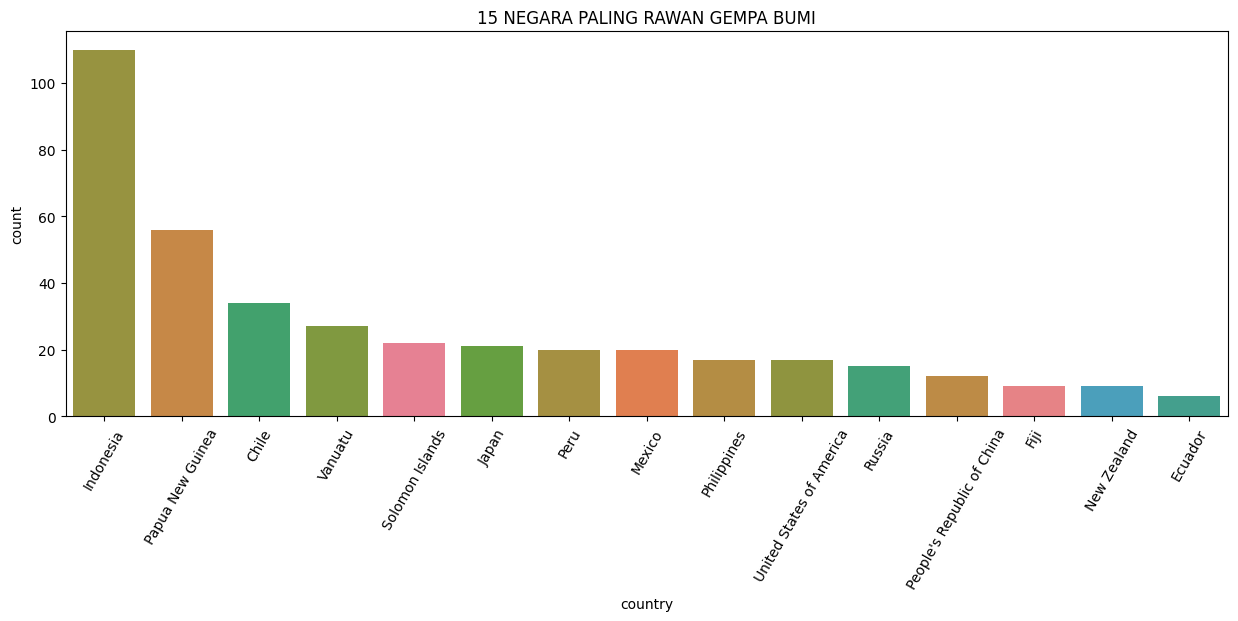

In [ ]:
# Buat palet warna untuk jumlah kategori
unique_values = df['country'].unique()
palette = sns.color_palette("husl", len(unique_values))

o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o, hue='country', palette=palette, dodge=False, legend=False)
plt.xticks(rotation=60)
plt.title('15 NEGARA PALING RAWAN GEMPA BUMI')

Text(0.5, 1.0, 'PELUANG TSUNAMI DI 10 NEGARA PALING RAWAN GEMPA BUMI')

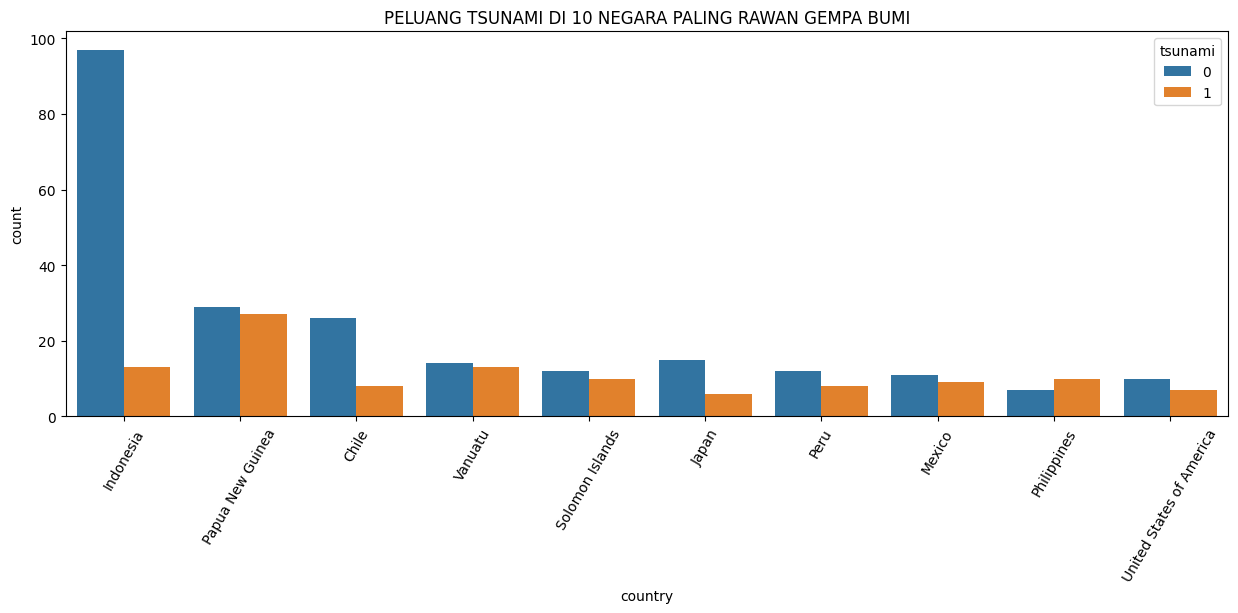

In [ ]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('PELUANG TSUNAMI DI 10 NEGARA PALING RAWAN GEMPA BUMI')

Text(0.5, 1.0, 'JUMLAH GEMPA BUMI YANG TERJADI DI INDONESIA PER TAHUN')

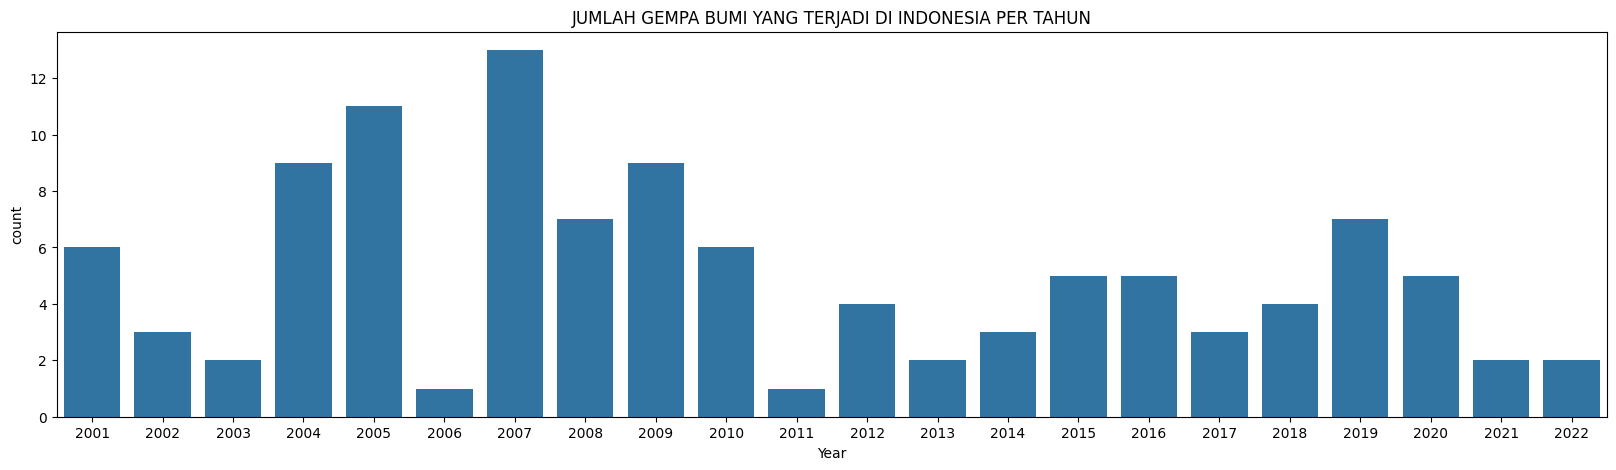

In [ ]:
Indo=df[df['country']=='Indonesia']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Indo)
plt.title('JUMLAH GEMPA BUMI YANG TERJADI DI INDONESIA PER TAHUN')

In [ ]:


import pandas as pd
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
        hover_name=hover_name,
        size=size,
        color_discrete_sequence=cl_disc_seq,
        zoom=zoom, height=height
    )

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )

    return fig

In [ ]:
# Memvisualisasikan Lokasi dan Magnitudo Gempa Bumi
df['power'] = pow(10, df['magnitude']) / pow(3, df['magnitude'])
df['power'] = df['power'].round(0)

fig = make_world_fig(df, 'latitude', 'longitude', 'magnitude', 'power', ["red"], 1.5, 500)
fig.show()

# **KORELASI**

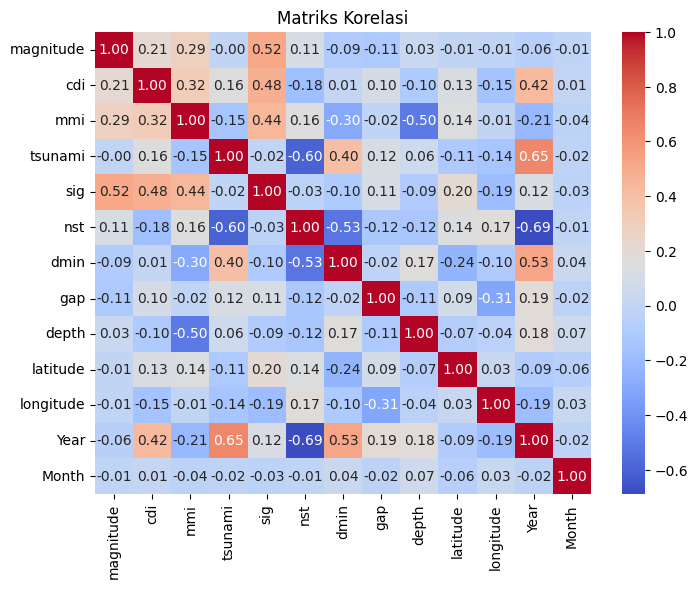

In [ ]:
# Hitung matriks korelasi
corr = df_numeric.corr()
# Buat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
correlations = df_numeric.corr()
print(correlations)

           magnitude       cdi       mmi   tsunami       sig       nst  \
magnitude   1.000000  0.209549  0.285552 -0.004726  0.515871  0.113114   
cdi         0.209549  1.000000  0.317937  0.160266  0.479788 -0.175417   
mmi         0.285552  0.317937  1.000000 -0.147363  0.442423  0.160417   
tsunami    -0.004726  0.160266 -0.147363  1.000000 -0.015500 -0.600231   
sig         0.515871  0.479788  0.442423 -0.015500  1.000000 -0.030100   
nst         0.113114 -0.175417  0.160417 -0.600231 -0.030100  1.000000   
dmin       -0.091403  0.006554 -0.299074  0.400752 -0.095318 -0.529371   
gap        -0.110626  0.098143 -0.015723  0.116360  0.114285 -0.118812   
depth       0.030644 -0.097891 -0.504439  0.056814 -0.088667 -0.121982   
latitude   -0.008552  0.129003  0.144883 -0.113209  0.204306  0.144204   
longitude  -0.013911 -0.149048 -0.005803 -0.136778 -0.190132  0.173665   
Year       -0.057083  0.423158 -0.212855  0.647211  0.124439 -0.688602   
Month      -0.011926  0.007002 -0.0352

In [ ]:

# Ekstrak kolom magnitude
magnitude = df['magnitude']

# Inisialisasi dictionary untuk menyimpan korelasi
correlations = {}

# Hitung korelasi antara magnitude dan setiap kolom lainnya
for col in df_numeric:
    if col != 'magnitude':
        correlations[col] = df[col].corr(magnitude)

# Temukan kolom dengan korelasi terbesar (positif atau negatif)
best_correlation = max(correlations, key=lambda k: abs(correlations[k]))

# Tampilkan hasil
print("Korelasi antara magnitude dan kolom lainnya:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.4f}")

print(f"\nKolom dengan korelasi terbesar terhadap magnitude: {best_correlation}")
print(f"Nilai korelasinya: {correlations[best_correlation]:.4f}")


Korelasi antara magnitude dan kolom lainnya:
cdi: 0.2095
mmi: 0.2856
tsunami: -0.0047
sig: 0.5159
nst: 0.1131
dmin: -0.0914
gap: -0.1106
depth: 0.0306
latitude: -0.0086
longitude: -0.0139
Year: -0.0571
Month: -0.0119

Kolom dengan korelasi terbesar terhadap magnitude: sig
Nilai korelasinya: 0.5159


In [ ]:
df = df.dropna(subset=['latitude', 'longitude', 'depth', 'magnitude'])


In [ ]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['depth'] = pd.to_numeric(df['depth'], errors='coerce')
df['magnitude'] = pd.to_numeric(df['magnitude'], errors='coerce')


# **KORELASI MANUAL**
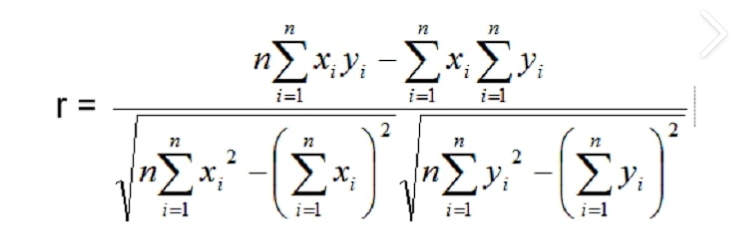

In [ ]:

# Memisahkan fitur (X) dan target (y)
X = df[['latitude', 'longitude', 'depth']]
y = df['magnitude']

# Inisialisasi dictionary untuk menyimpan korelasi manual
manual_correlations = {}

# Hitung korelasi Pearson manual antara setiap fitur dan magnitude
for col in X.columns:
    x = X[col]
    n = len(x)

    # Hitung jumlah dari x dan y
    sumX = np.sum(x)
    sumY = np.sum(y)

    # Hitung jumlah dari hasil kali x dan y
    sumXY = np.sum(x * y)

    # Hitung jumlah dari kuadrat x dan y
    sumX2 = np.sum(x**2)
    sumY2 = np.sum(y**2)

    # Hitung atas dan bawah untuk rumus Pearson
    atas = n * sumXY - sumX * sumY
    bawah = np.sqrt((n * sumX2 - sumX**2) * (n * sumY2 - sumY**2))

    # Hitung koefisien korelasi Pearson
    r = atas / bawah

    # Simpan hasil manual
    manual_correlations[col] = r

# Tampilkan hasil manual
print("Koefisien Korelasi Pearson (Manual):")
for col, r in manual_correlations.items():
    print(f"{col}: {r:.4f}")

# Bandingkan dengan hasil dari pandas
pandas_correlations =  df_numeric.corr()['magnitude'][['latitude', 'longitude', 'depth']]

print("\nKoefisien Korelasi Pearson (Pandas):")
print(pandas_correlations)


Koefisien Korelasi Pearson (Manual):
latitude: -0.0086
longitude: -0.0139
depth: 0.0306

Koefisien Korelasi Pearson (Pandas):
latitude    -0.008552
longitude   -0.013911
depth        0.030644
Name: magnitude, dtype: float64


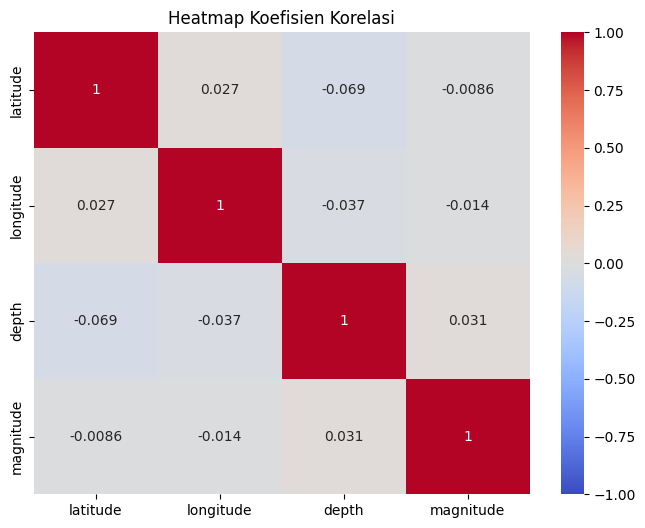

In [ ]:
# Pilih hanya kolom numerik yang relevan
df_numeric = df[['latitude', 'longitude', 'depth', 'magnitude']]

# Hitung matriks korelasi penuh
correlation_matrix = df_numeric.corr()

# Plot heatmap dari matriks korelasi penuh
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Koefisien Korelasi')
plt.show()


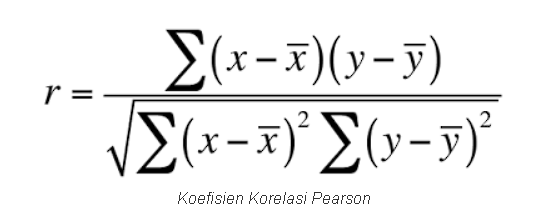

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df[['nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']]
y = df['magnitude']

# Inisialisasi dictionary untuk menyimpan korelasi manual
manual_correlations = {}

# Hitung korelasi Pearson manual antara setiap fitur dan magnitude
for col in X.columns:
    x = X[col]
    n = len(x)

    # Hitung mean dari x dan y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Hitung komponen untuk rumus Pearson
    sum_xy = np.sum((x - mean_x) * (y - mean_y))
    sum_x2 = np.sum((x - mean_x)**2)
    sum_y2 = np.sum((y - mean_y)**2)

    # Hitung koefisien korelasi Pearson
    r = sum_xy / np.sqrt(sum_x2 * sum_y2)

    # Simpan hasil manual
    manual_correlations[col] = r

# Tampilkan hasil manual
print("Koefisien Korelasi Pearson (Manual):")
for col, r in manual_correlations.items():
    print(f"{col}: {r:.4f}")

# Bandingkan dengan hasil dari pandas
pandas_correlations = df_numeric.corr()['magnitude'][['latitude', 'longitude', 'depth']]

print("\nKoefisien Korelasi Pearson (Pandas):")
print(pandas_correlations)

Koefisien Korelasi Pearson (Manual):
nst: 0.1131
dmin: -0.0914
gap: -0.1106
depth: 0.0306
latitude: -0.0086
longitude: -0.0139

Koefisien Korelasi Pearson (Pandas):
latitude    -0.008552
longitude   -0.013911
depth        0.030644
Name: magnitude, dtype: float64


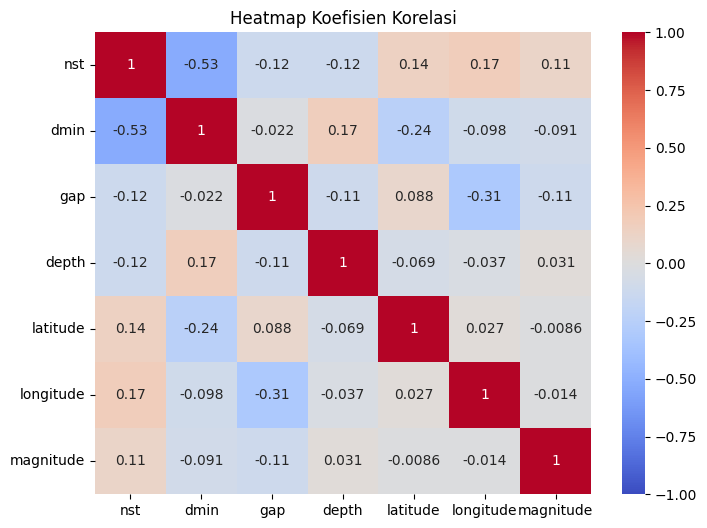

In [ ]:
# Pilih hanya kolom numerik yang relevan
df_numeric = df[['nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'magnitude']]

# Hitung matriks korelasi penuh
correlation_matrix = df_numeric.corr()

# Plot heatmap dari matriks korelasi penuh
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Koefisien Korelasi')
plt.show()

# **REGRESI MANUAL**
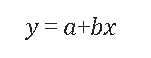

dimana :

𝑦 = Variabel terikat (dependent)

𝑎 = Konstanta

𝑏 = Koefisien

𝑥 = Variabel bebas (independent)

In [ ]:

# Pisahkan fitur (X) dan target (y)
X = df[['latitude', 'longitude', 'depth']]
y = df['magnitude']

n = len(x)
sumX =np.sum(x)
sumY =np.sum(y)

sum_xy = np.sum(x*y)



x2 = sumX**2
y2 = sumY**2

sum_x2 = np.sum(x**2)
sum_y2 = np.sum(y**2)

**mencari nilai konstanta a**

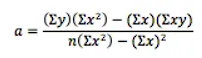

**mencari nilai koefisien b**

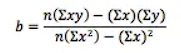

Konstanta (beta_0): 6.943890797808277
Koefisien (beta_1): -5.256643607567151e-05
Nilai dari y_pred: 
0      6.935501
1      6.938595
2      6.953266
3      6.952939
4      6.934519
         ...   
777    6.948551
778    6.951948
779    6.935103
780    6.937220
781    6.937237
Name: longitude, Length: 782, dtype: float64


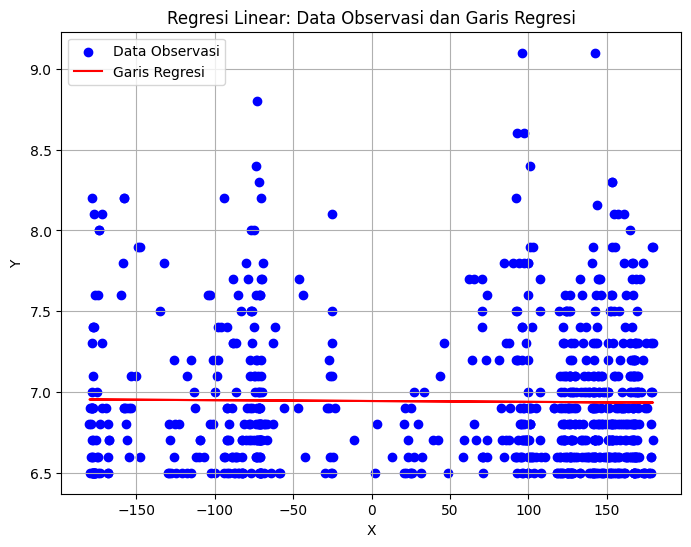

In [ ]:
# Hitung A dan B
# mencari konstanta a
A = (sumY*sum_x2 - sumX*sum_xy)/(n*sum_x2 - sumX**2)
# mencari koefisien b
B = (n*sum_xy - sumX*sumY)/(n*sum_x2 - sumX**2)

# Konstanta (intersep) dan Koefisien (kemiringan)
konstanta = A
koefisien = B

print(f'Konstanta (beta_0): {konstanta}')
print(f'Koefisien (beta_1): {koefisien}')

# Menghitung Y dari rumus regresi linear
y_pred = konstanta + koefisien * x
print(f'Nilai dari y_pred: \n{y_pred}')
# Plot data observasi dan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Observasi')
plt.plot(x, y_pred, color='red', label='Garis Regresi')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresi Linear: Data Observasi dan Garis Regresi')
plt.legend()
plt.grid(True)
plt.show()

# **LINEAR REGRESSION**

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df[['nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']]
y = df['magnitude']

# Membagi data menjadi data latihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)







# Contoh data baru untuk prediksi
new_data = pd.DataFrame({
    'nst': [12],         # Jumlah stasiun seismik yang digunakan
    'dmin': [0.5],       # Jarak horizontal dari episentrum ke stasiun terdekat
    'gap': [25],         # Jarak azimutal terbesar antar stasiun
    'depth': [10.0],     # Kedalaman gempa
    'latitude': [35.0],  # Garis lintang episentrum
    'longitude': [-120.0] # Garis bujur episentrum
})

# Prediksi magnitudo menggunakan model
predicted_magnitude = model.predict(new_data)



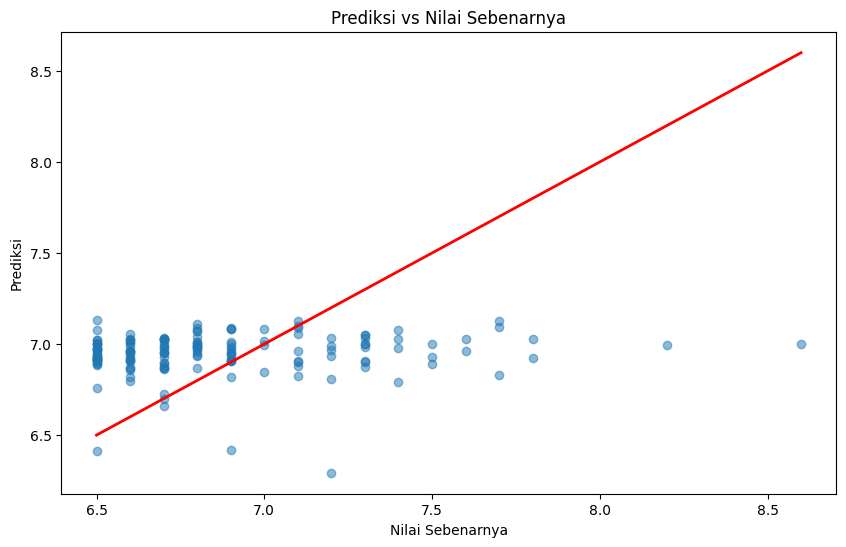

In [ ]:
# Plot Prediksi vs Nilai Sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Nilai Sebenarnya")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

**EVALUASI dan Prediksi**

In [ ]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r2:.2f}')
print(f'Nilai dari y_pred: \n{y_pred}')
# Prediksi magnitudo menggunakan model
mse_manual = mean_squared_error(mse, y_pred)
print(f'MSE Manual: {mse_manual}')
print(f'Predicted Magnitude: {predicted_magnitude[0]:.4f}')

Mean Squared Error: 0.15
R-Squared: -0.09
Nilai dari y_pred: 
[6.99769376 6.98493929 6.92085713 6.84471241 6.41627485 6.97861085
 6.79008998 6.93345964 6.93505176 6.92165009 6.96818696 7.13172695
 6.92587736 7.04058322 7.02828248 6.92797905 7.02142662 6.72450737
 6.92769171 6.86742868 6.87088178 6.75941745 6.82796045 7.02646041
 6.81915955 7.00545907 6.90918717 7.02850904 6.97350062 6.91763075
 6.9804885  6.91407344 6.87823074 6.91922604 7.05134724 7.00252323
 6.94344712 6.98504473 6.91676399 6.98665718 7.00497127 7.08137252
 6.82105217 7.05522276 7.02432534 7.12499535 6.8883476  7.00101857
 6.9077281  6.98290067 6.99955356 7.00511194 6.82331134 6.65718435
 7.00124558 6.9132637  6.69751059 6.9986724  7.0205201  6.96636333
 7.0707463  6.91284727 6.93940116 6.41431262 6.90725465 7.02661738
 6.9863427  6.95606557 6.96429919 6.95178921 7.02686805 7.03057556
 6.91459044 6.85990449 6.90686217 6.98662709 6.97633885 6.90686694
 7.02461338 6.806445   7.08302592 7.0293759  6.9984633  6.98104247


TypeError: Singleton array 0.15026058604619713 cannot be considered a valid collection.

# **KLAFIKASI**

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67        91
           1       0.55      0.53      0.54        66

    accuracy                           0.62       157
   macro avg       0.61      0.61      0.61       157
weighted avg       0.62      0.62      0.62       157

Confusion Matrix:
[[62 29]
 [31 35]]


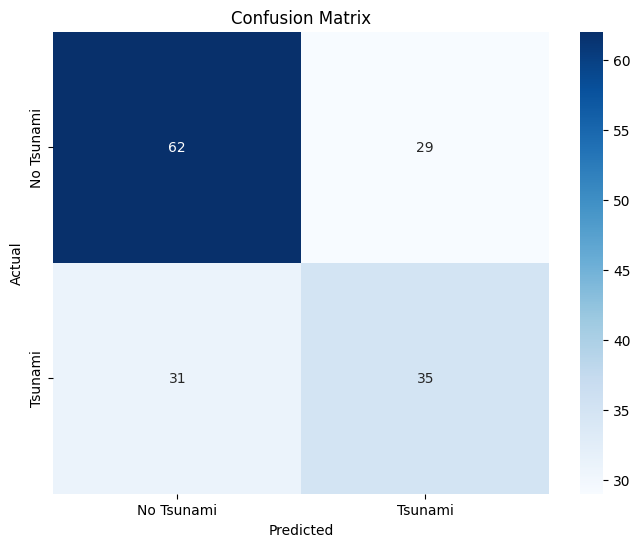

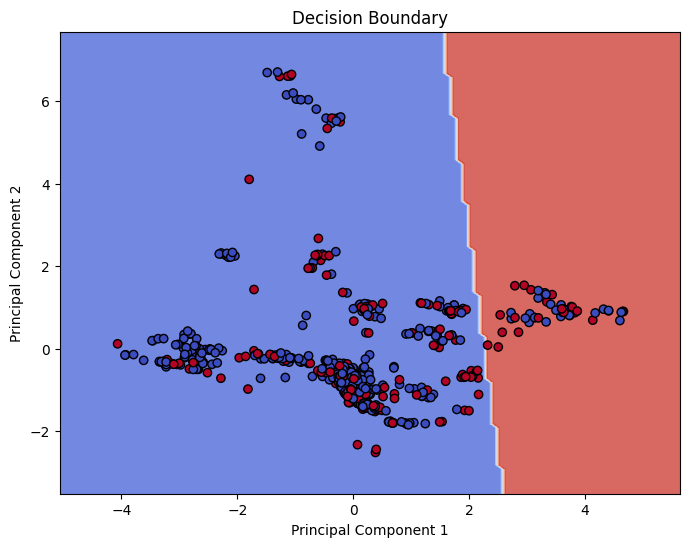

Predicted Class: 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
# Pisahkan fitur (X) dan target (y)
X = df[['magnitude', 'depth', 'latitude', 'longitude', 'location', 'continent']]
y = df['tsunami']

# Konversi data kategorikal ke bentuk numerik dengan One-Hot Encoding
X = pd.get_dummies(X, columns=['location', 'continent'], drop_first=True)

# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi dan pelatihan model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Tsunami', 'Tsunami'], yticklabels=['No Tsunami', 'Tsunami'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi Decision Boundary menggunakan PCA
# Mengurangi dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Inisialisasi model baru dan pelatihan pada data PCA
model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca, y_train)

# Plot decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Prediksi pada grid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary')
plt.show()

# Buat template untuk data baru dengan struktur yang sama dengan data pelatihan
new_data_template = pd.DataFrame(columns=X.columns)

# Data baru untuk prediksi
new_data = pd.DataFrame({
    'magnitude': [6.5],
    'depth': [11.0],
    'latitude': [34.5],
    'longitude': [-120.5],
    'location_Malango, Solomon Islands': [1],  # Lokasi baru
    'continent_Oceania': [1]  # Benua baru
})

# Gabungkan new_data dengan template
new_data = pd.concat([new_data_template, new_data], ignore_index=True, sort=False).fillna(0)

# Normalisasi data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi class untuk data baru
predicted_class = model.predict(new_data_scaled)
print(f'Predicted Class: {predicted_class[0]}')
